# 1. Perceptrón
El **perceptrón** es una unidad básica de inferencia en forma de discriminador lineal, a partir de lo cual se desarrolla un algoritmo capaz de generar un criterio para seleccionar un sub-grupo a partir de un grupo de componentes más grande.

La limitación de este algoritmo es que si dibujamos en un plot estos elementos, se deben poder separar con un hiperplano únicamente los elementos "deseados" discriminándolos (separándolos) de los "no deseados".

En el presente notebook vamos a contruir un perceptrón que nos permita discriminar algunas condiciones de interés, sobre los datos artificiales queque fueron recolectados en clase.

In [2]:
## Lectura de los datos de clase
X <- readRDS("X.rds")
head(X)

Edad,Estatura,Peso,Sexo,Mascotas,Digitos.Cedula
33,178,90,Masculino,2,96
26,160,67,Femenino,2,91
34,186,94,Masculino,2,59
26,186,83,Masculino,1,43
25,176,65,Masculino,3,97
30,175,82,Masculino,0,60


La primera línea a continuación realiza una ´normalización´ para las variables peso y sexo, lo cual resulta necesario para.... Codificamos además la variable sexo como 1 si es masculino y o si es femenino. Por último añadimos una columna de unos.

In [3]:
X[,c(2:3)] <- X[,c(2,3)]/100
X$G <- substr(X$Sexo, 1, 1)
X$g <- as.numeric(X$G=="M")
X$Uno <- 1
head(X)

Edad,Estatura,Peso,Sexo,Mascotas,Digitos.Cedula,G,g,Uno
33,1.78,0.90,Masculino,2,96,M,1,1
26,1.60,0.67,Femenino,2,91,F,0,1
34,1.86,0.94,Masculino,2,59,M,1,1
26,1.86,0.83,Masculino,1,43,M,1,1
25,1.76,0.65,Masculino,3,97,M,1,1
30,1.75,0.82,Masculino,0,60,M,1,1


El perceptrón usa una matriz para representar las redes neuronales y es un discriminador que traza su entrada x (un vector binario) a un único valor de salida $f(x)$ (un solo valor binario) a través de dicha matriz.



\begin{equation*}
f(x) = \begin{cases}1 & \text{si }w \cdot x > 0\\0 & \text{en otro caso}\end{cases}
\end{equation*}



Donde $w$ es un vector de pesos reales y $w\cdot x$ es el producto escalar (que computa una suma ponderada). El valor de $f(x)$ (0 o 1) se usa para clasificar $x$ como un caso positivo o un caso negativo, en el caso de un problema de clasificación binario. La suma ponderada de las entradas debe producir un valor mayor que 0 para cambiar la neurona de estado 0 a 1.

A continuación se define la función $f$ que evaluará las sumas de dicho producto escalar:

In [4]:
f <- function(x){
  if(x>0) return(1)
  return(0)
}

La gráfica a continuación identifica el sexo de cada persona a partir de su estatura y el peso.  Nótese que a priori es posible separar los dos grupos con una línea recta.

Warning message:
"package 'repr' was built under R version 3.4.4"

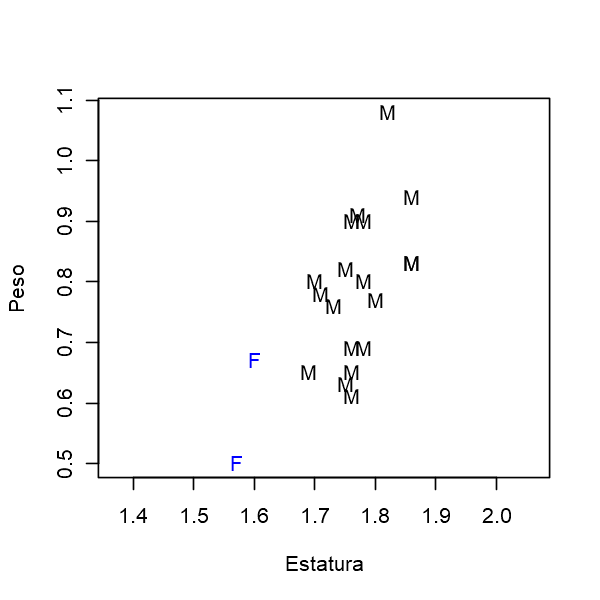

In [5]:
library(repr); options(repr.plot.width=5, repr.plot.height=5)
plot(X$Estatura, X$Peso, type = "n", xlab="Estatura", ylab="Peso",asp=1)
cols <- rep("blue",nrow(X))
cols[which(X$G=="M")] <- "black"
text(X$Estatura, X$Peso, X$G, col=cols)

La intención ahora es separar mediante una línea (plano en 2D), las dos categorías. Para ello definimos el algoritmo de aprendizaje, el cual inicia con unos pesos iniciales definidos como el vecto de ceros, y a partir de los cuales evalúa la función $f$. Los pesos van siendo corregidos usando la regla de aprendizaje del **perceptrón simple**.  

Se realizan 10000 iteraciones del algoritmo, donde la última iteración representada por la línea negra, separa de manera óptima las dos clases.

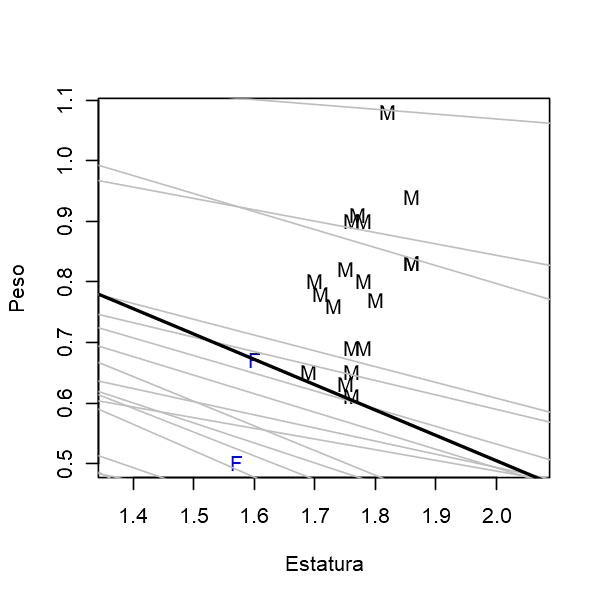

In [6]:
## Gráfico inicial
plot(X$Estatura, X$Peso, type = "n", xlab="Estatura", ylab="Peso",asp=1)
cols <- rep("blue",nrow(X))
cols[which(X$G=="M")] <- "black"
text(X$Estatura, X$Peso, X$G, col=cols)

## Pesos sinápticos de entrada
w <- c(0,0,0) #Estatura, Peso, Ind

done <- FALSE
iter <- 0
max.iter <- 10000
while(!done){
  ind <- sample(1:nrow(X), size=1)
  h <- f(sum(w * X[ind,c(2,3,9)]))
  # regla de aprendizaje del Perceptrón simple
  w <- w + 1 * (X$g[ind] - h) * unlist(X[ind, c(2,3,9)])
  
  a <- -w[3]/w[2] #intercepto
  b <- -w[1]/w[2] #pendiente pasando por el origen
  if(iter%%100==0){
    abline(a, b, col="grey")
    #Sys.sleep(0.1)
    #print(iter)
  }
  
  iter <- iter + 1
  ###
  ### Aparte de esta, qué otra(s) condición de parada se podría usar?
  if(iter >= max.iter) done <- TRUE
  ###
}

abline(a,b,col="black",lwd=2)